In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import warnings
warnings.simplefilter("ignore")
import sklearn.metrics

In [2]:
data = pd.read_csv(r"C:\Users\mvsan\Downloads\Social_Network_Ads.csv")

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

<AxesSubplot:>

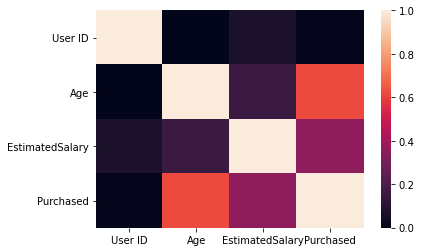

In [6]:
corr=data.corr()
sb.heatmap(corr)

In [7]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
data.shape

(400, 5)

In [10]:
#split the dataset into train and test
from sklearn.model_selection import train_test_split
train,test=train_test_split(data,test_size=0.20,random_state=0)

In [12]:
train.shape,test.shape

((320, 5), (80, 5))

In [13]:
test.to_csv('test.csv',index=False,encoding='utf-8')

In [15]:
#split the train data into train and cross validation
train_data,cv_data=train_test_split(train,test_size=0.20,random_state=0)

In [16]:
train_data.shape,cv_data.shape

((256, 5), (64, 5))

In [17]:
x_train=train_data.iloc[:,[2,3]].values
y_train=train_data.iloc[:,4].values

In [18]:
x_train.shape

(256, 2)

In [19]:
x_cv=cv_data.iloc[:,[2,3]].values
y_cv=cv_data.iloc[:,4].values

In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)

In [21]:
#fitting the LogisticRegression to the training set 
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
#that the classifier learns corr between x_train and y_train
classifier.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [23]:
#predicting the train set result
y_pred=classifier.predict(x_train)
dataset=pd.DataFrame({'Actual':y_train,'Predicted':y_pred})
dataset.head()

,Actual,Predicted
0,1,1
1,1,0
2,1,0
3,1,1
4,1,1


In [25]:
#predicting the cross validation result
y_predict=classifier.predict(x_cv)
dataset=pd.DataFrame({'Actual':y_cv,'Predicted':y_predict})
dataset.head()

,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,0,1


In [26]:
#check accuracy for X train data
Acc_Train=sklearn.metrics.balanced_accuracy_score(y_pred,y_train)*100
print(Acc_Train)

83.92045454545455


In [27]:

#check accuracy for x_cv data
Acc_cv=sklearn.metrics.accuracy_score(y_predict,y_cv)*100
print(Acc_cv)

40.625


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


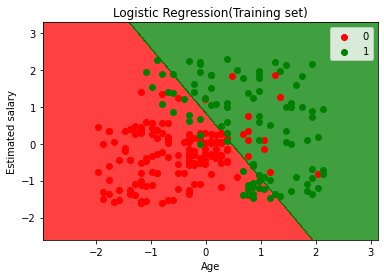

In [28]:
#visualizing the training set result
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
x_set,y_set=x_train,y_train
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                  np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
                c=ListedColormap(('red','green'))(i),label=j)
plt.title('Logistic Regression(Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated salary')
plt.legend()
plt.show()